# Предобработка

In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
with open('keywords.txt', 'r', encoding='utf-8') as f:
    companies = f.readlines()[1].split(', ')

In [3]:
df = pd.read_csv('lenta_2021_2024.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,docid,url,title,modified,lastmodtime,type,domain,status,part,bloc,tags,image_url,pubdate,text,rightcol,snippet
0,0,0,1067960,https://lenta.ru/news/2021/04/01/sahar/,В российские магазины перестали поставлять сахар,1617236100,1617279786,1,1,0,0,4,[198],https://icdn.lenta.ru/images/2021/04/01/03/202...,1617236100,Фото: Виталий Аньков / РИА Новости Илья Соболе...,Заводы приостановили продажи продукта торговым...,Фото: Виталий Аньков / РИА Новости Илья ... им...
1,1,1,1067977,https://lenta.ru/news/2021/04/01/trillion/,Байден представил план по спасению экономики н...,1617246403,1617246403,1,1,0,0,4,[7],https://icdn.lenta.ru/images/2021/04/01/06/202...,1617246403,Фото: Reuters Милана Микаилова Президент США Д...,"Президент США отметил, что это крупнейшее влож...",Фото: Reuters Милана Микаилова Президент ... э...
2,2,2,1067979,https://lenta.ru/news/2021/04/01/business/,Бизнес в России увеличил прибыль,1617248460,1617252223,1,1,0,0,4,[9],https://icdn.lenta.ru/images/2021/04/01/06/202...,1617248460,Фото: Евгений Биятов / РИА Новости Милана Мика...,В январе 2021 года обороты российских предприя...,"Фото: Евгений Биятов / РИА Новости ... больше,..."
3,3,3,1067984,https://lenta.ru/news/2021/04/01/kredit/,Россиянам назвали способ исправить плохую кред...,1617253029,1617253029,1,1,0,0,4,"[10, 11]",https://icdn.lenta.ru/images/2021/04/01/07/202...,1617253029,Фото: Владимир Трефилов / РИА Новости Илья Соб...,Для этого следует завести новую кредитную карту,Фото: Владимир Трефилов / РИА Новости ... испр...
4,4,4,1067989,https://lenta.ru/news/2021/04/01/finansist/,Финансист предостерег россиян от покупки подде...,1617255774,1617255775,1,1,0,0,4,[],https://icdn.lenta.ru/images/2021/04/01/08/202...,1617255774,Фото: Globallookpress.com Лика Миргородская Фи...,Он призвал конвертировать валюту безналичным с...,Фото: Globallookpress.com Лика ... россиян от ...


In [4]:
df_cleared = pd.DataFrame({'pubdate': [], 'label': [], 'score': [], 'text': []})

In [5]:
for index, row in tqdm(df.iterrows()):
    for company_name in companies:
        try:
            if company_name in row['text']:
                row = [row['pubdate'], None, None, row['text']]
                df_cleared.loc[len(df_cleared)] = row
                continue
        except Exception:
            ...

0it [00:00, ?it/s]

39948it [00:56, 713.24it/s] 


# Берт

In [6]:
import os
import torch
import transformers
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

In [7]:
pipe = pipeline("text-classification", model="MonoHime/rubert-base-cased-sentiment-new")
tokenizer = AutoTokenizer.from_pretrained("MonoHime/rubert-base-cased-sentiment-new")
model = AutoModelForSequenceClassification.from_pretrained("MonoHime/rubert-base-cased-sentiment-new")

In [8]:
for index, row in tqdm(df_cleared.iterrows()):
    text = row['text'][:512]
    output = pipe(text)
    df_cleared.at[index, 'label'] = output[0]['label']
    df_cleared.at[index, 'score'] = output[0]['score']

7607it [15:07,  8.38it/s]


In [9]:
df_cleared.to_csv('cleared_lenta.csv')

In [12]:
import matplotlib.pyplot as plt

(array([5467.,    0.,    0.,    0.,    0., 2028.,    0.,    0.,    0.,
         112.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

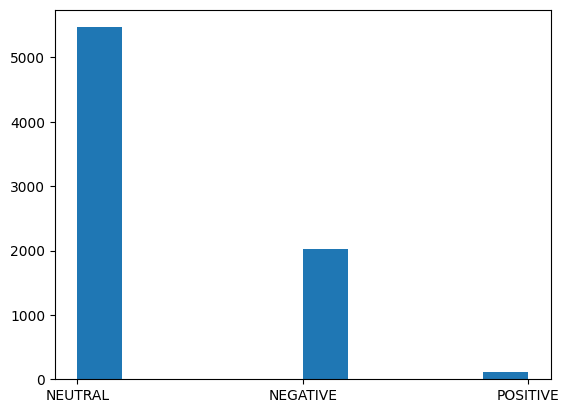

In [13]:
plt.hist(df_cleared['label'])